In [1]:
import os
from annot import annotations
import matplotlib.pyplot as plt
from matplotlib import image
import cv2
import utility
import numpy as np
import configurations
import model_gen
import tensorflow as tf

In [2]:
data_loader = annotations.Data()
util = utility.Util()
config = configurations.Configuration()

In [3]:
df = util.get_dataframe()

In [4]:
sample = list(df.iloc[1])

In [5]:
im = util.imread_from_id(sample[0])
keypoints = np.array(sample[1:])

In [6]:
keypoints

array([738, 538, 734, 440, 717, 355, 770, 355, 766, 443, 768, 523, 744,
       355, 737, 216, 739, 197, 745, 132, 639, 302, 684, 276, 692, 217,
       782, 215, 805, 280, 850, 308, 754, 335])

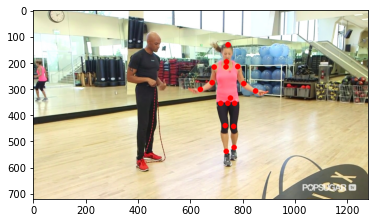

In [7]:
plt.imshow(util.to_rgb(util.draw_keypoints(im, keypoints, 10)))

In [9]:
model = tf.keras.models.load_model("models/model_v6/")

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [11]:
config.INPUT_DIMS[:2]

(224, 224)

In [12]:
resized = cv2.resize(im.copy(), (224,224))
rescaled = resized / 255

In [13]:
rescaled.shape

(224, 224, 3)

In [14]:
y_pred = model.predict(rescaled.reshape(1,224,224,3))

1/1 [==============================] - 5s 5s/step


In [15]:
y_pred.ravel().astype(int)

array([550, 569, 579, 558, 569, 574, 570, 569, 562, 582, 562, 552, 574,
       576, 563, 583, 565, 575, 573, 571, 568, 572, 572, 581, 570, 573,
       572, 569, 582, 578, 583, 581, 568, 579])

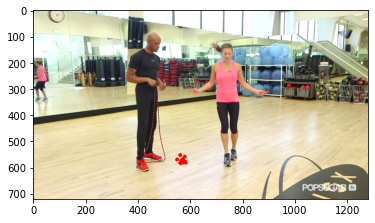

In [20]:
plt.imshow(util.to_rgb(util.draw_keypoints(im, y_pred.ravel(), 7)))

In [17]:
from keras.utils.vis_utils import plot_model 

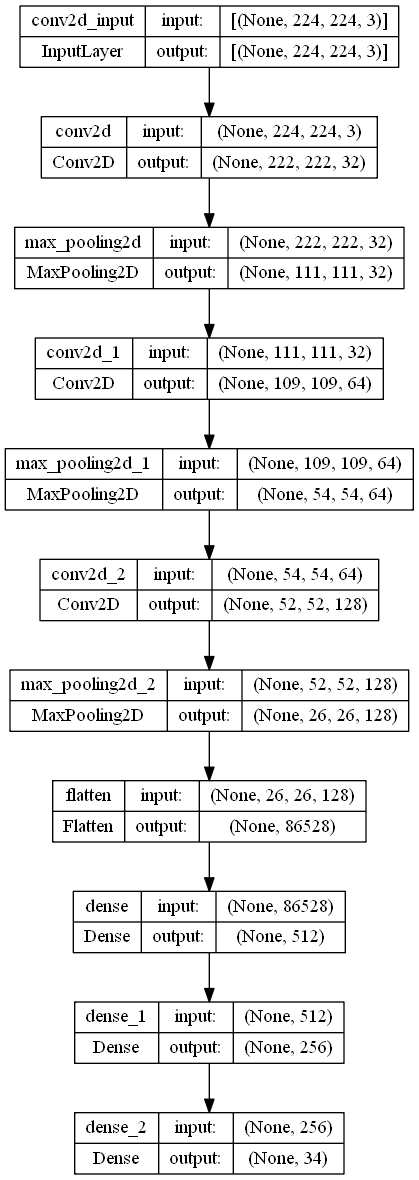

In [18]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)